In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
# from ipywidgets import interact
# from bokeh.settings import settings
# from bokeh.io import push_notebook, show, output_notebook
# from bokeh.plotting import figure, output_file, show
# output_notebook()
print("numpy %s" % np.__version__)
print("pandas %s" % pd.__version__)
# print("matplotlib %s" % mpl.__version__)
print("missingno %s" % msno.__version__)

numpy 1.19.2
pandas 1.2.2
missingno 0.4.2


# Matplotlib rcParams

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use(['seaborn-bright', 'seaborn-notebook'])

In [5]:
plt.rcParams.update({
#     "axes.titlesize" : 20,
#     "axes.labelsize" : 17,
    "axes.grid" : True, 
    "grid.color": "lightgray",
#     "lines.linewidth" : 3,
#     "lines.markersize" : 10,
#     "xtick.labelsize" : 14,
#     "ytick.labelsize" : 14,
    "figure.autolayout": True
})

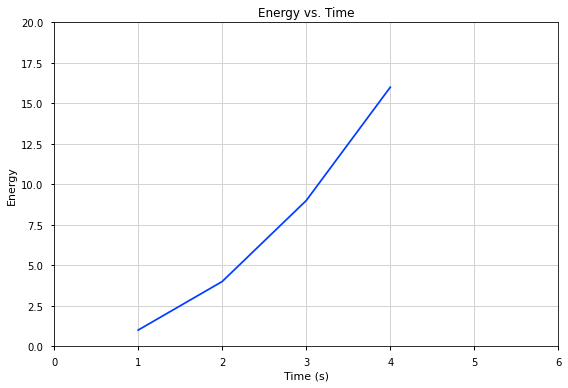

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.axis([0, 6, 0, 20])
plt.title("Energy vs. Time")
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()

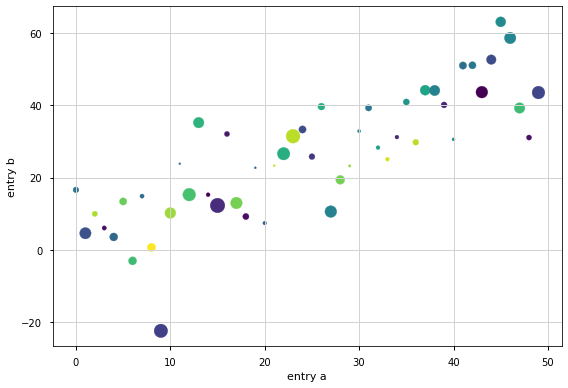

In [7]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Exploratory Data Analysis (EDA)

## Time Series
Only in Germany

In [8]:
ts = pd.read_csv("time_series_60min_singleindex.csv")

In [8]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 115.4+ MB


In [15]:
cols = [col for col in ts.columns if 'DE' in col]
print('Number of columns relating to Germany: {}'.format(len(cols)))
cols

Number of columns relating to Germany: 41


['DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile',
 'DE_50hertz_load_actual_entsoe_transparency',
 'DE_50hertz_load_forecast_entsoe_transparency',
 'DE_50hertz_solar_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_50hertz_wind_onshore_generation_actual',
 'DE_LU_load_actual_entsoe_transparency',
 'DE_LU_load_forecast_entsoe_transparency',
 'DE_LU_price_day_ahead',
 'DE_LU_solar_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_LU_wind_onshore_generation_actual',
 'DE_amprion_load_actual_entsoe_transparency',
 'DE_am

In [22]:
de = ts[cols]

In [23]:
de.head()

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
0,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,...,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0
2,40135.0,38813.0,37248.0,NaN,NaN,27913.0,9054.0,0.3244,667.0,514.0,...,13267.0,12858.0,NaN,3974.0,466.0,3508.0,5087.0,4562.0,NaN,7.0
3,39106.0,38490.0,37248.0,NaN,NaN,27913.0,9070.0,0.3249,667.0,518.0,...,12702.0,12611.0,NaN,4194.0,470.0,3724.0,4906.0,4517.0,NaN,8.0
4,38765.0,38644.0,37248.0,NaN,NaN,27913.0,9163.0,0.3283,667.0,520.0,...,12452.0,12490.0,NaN,4446.0,473.0,3973.0,4865.0,4601.0,NaN,11.0


In [24]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   DE_load_actual_entsoe_transparency               50400 non-null  float64
 1   DE_load_forecast_entsoe_transparency             50376 non-null  float64
 2   DE_solar_capacity                                43800 non-null  float64
 3   DE_solar_generation_actual                       50297 non-null  float64
 4   DE_solar_profile                                 43696 non-null  float64
 5   DE_wind_capacity                                 43800 non-null  float64
 6   DE_wind_generation_actual                        50326 non-null  float64
 7   DE_wind_profile                                  43725 non-null  float64
 8   DE_wind_offshore_capacity                        43800 non-null  float64
 9   DE_wind_offshore_generation_

<AxesSubplot:>

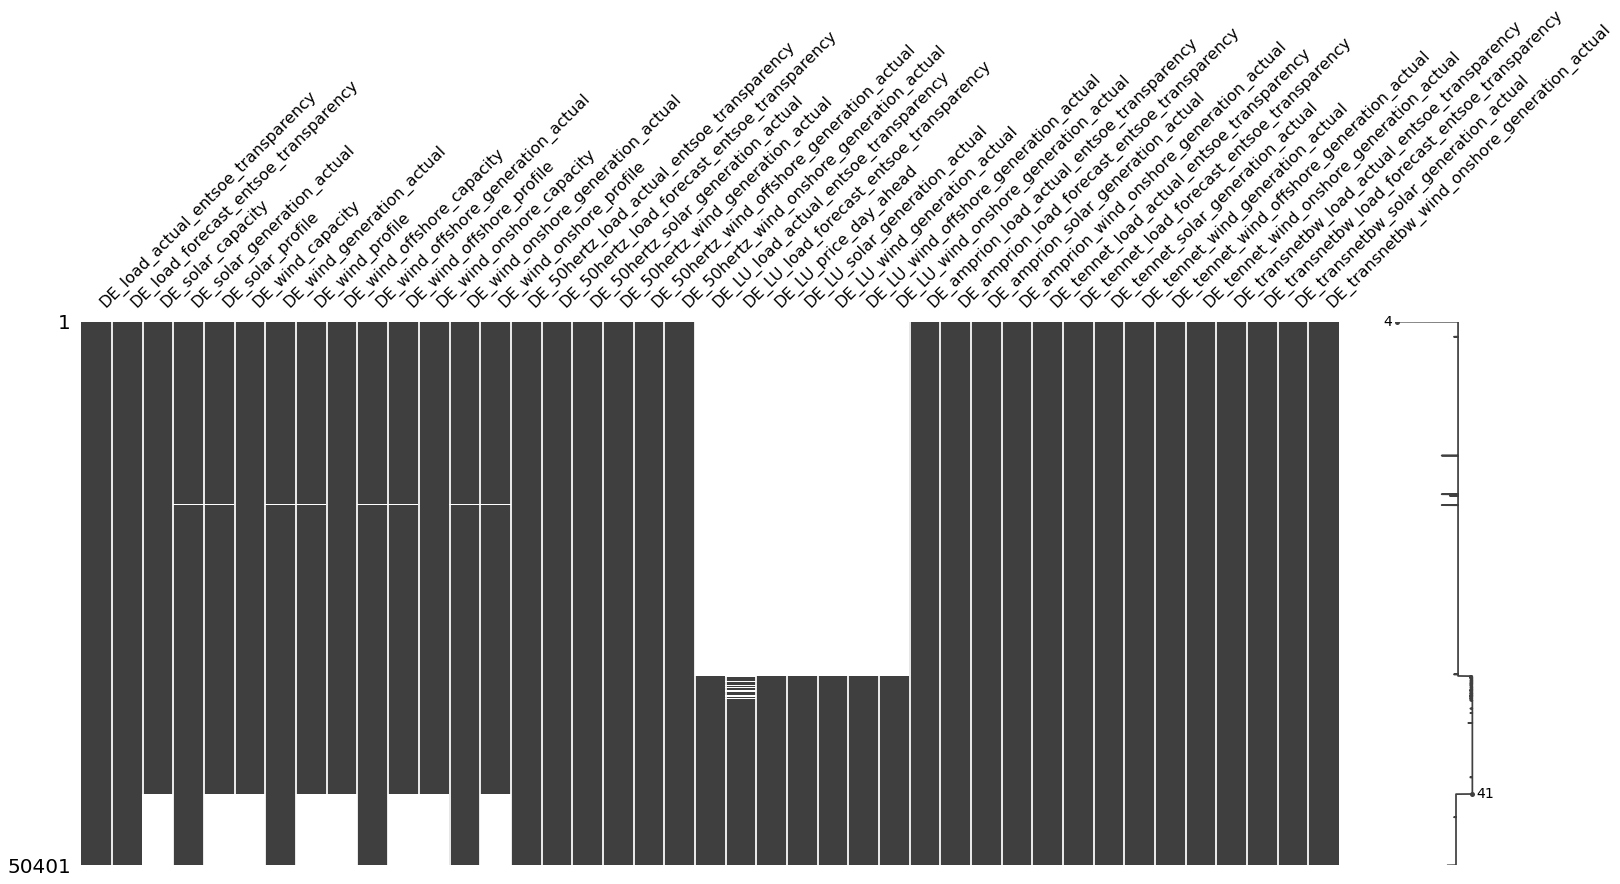

In [33]:
msno.matrix(de)

# Weather 

In [6]:
wt = pd.read_csv("../../data_check_for_proposal/weather_data.csv")